In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')

# Check shape of dataset
print('Train shape:', df_train.shape)
print('Train shape:', df_test.shape)

#Check for variable not present in test
print(df_train.columns.tolist())
print(df_test.columns.tolist())

Train shape: (891, 12)
Train shape: (418, 11)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Note : Test dataset has no survived column

In [3]:
# Check first 10 elements of train dataset
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


Note : There are missing values in column cabin and age

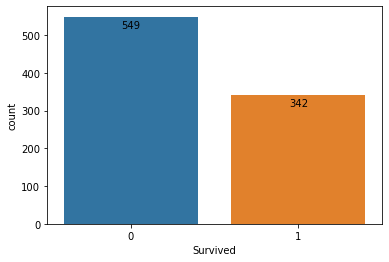

In [5]:
# Check for number of survivors
graph=sns.countplot(x='Survived',data=df_train)
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height -30,
        df_train['Survived'].value_counts()[i],ha="center")
    i += 1

Appears to be a classification problem with 2 classes, class 0(dead) and class1(survived), respectively. Next let's visualize the interdependence of features.

In [6]:
np.sum(df_train['Survived']==1)/df_train['Survived'].shape

array([0.38383838])

Of the 891 passengers in the train list only 38.38% survived

In [7]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Doling, Mrs. John T (Ada Julia Bone)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Note : The columns name, sex, cabin and embarked have string values

In [8]:
#Check for unique values in each column and determine the categorical variables
df_train.astype('object').describe(include='all').loc['unique', :]

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Name: unique, dtype: object

Note : Survived, Sex, SibSp, Parch, Embarked and Pclass are categorical variables.

# Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Hence, no variable gives the relationship with nannies, mistresses and fiances.

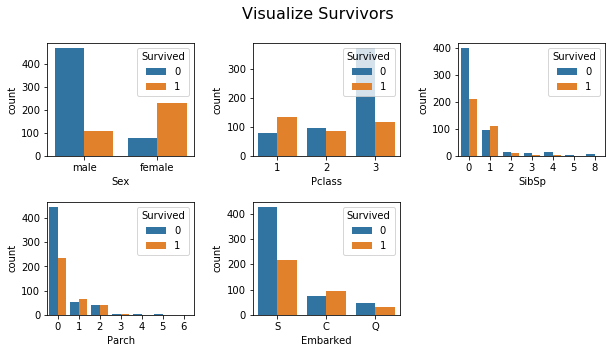

In [9]:
#Visualize survivors for categorical columns
categorical_cols=['Sex','Pclass','SibSp','Parch','Embarked']
n_rows=2
n_cols=3
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Visualize Survivors", fontsize=16)
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c+1 #index
        if (i!=6):
            ax=fig.add_subplot(2, 3, i)
            sns.countplot(df_train[categorical_cols[i-1]],hue=df_train['Survived'],ax=ax)
            ax.legend(title="Survived",loc='upper right')
plt.show()

Based on Graphs : 
1. Most Female passengers survived.
2. Most Class 1 passengers survived and class 3 passengers didn't.
3. Most Married people survived.

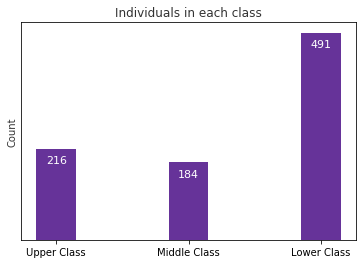

In [10]:
Pclass=df_train.groupby(by='Pclass').size()
pos=range(len(Pclass))
plt.figure()
bars=plt.bar(pos,Pclass,width=0.3, color='rebeccapurple')
plt.ylabel('Count', alpha=0.8)
plt.title('Individuals in each class', alpha=0.8)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.xticks(pos,['Upper Class','Middle Class','Lower Class'])
plt.yticks([])
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 35, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)
plt.show()

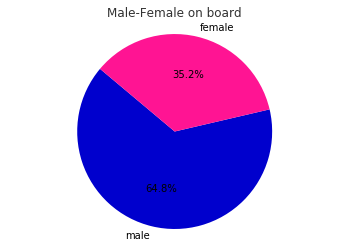

In [11]:
# Data to plot
height_sex=np.array([np.sum(df_train['Sex']=='male'),np.sum(df_train['Sex']=='female')])
labels = df_train['Sex'].unique()
colors = ['mediumblue','deeppink']

# Plot
plt.figure()
plt.pie(height_sex, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Male-Female on board',alpha=0.8)
plt.show()

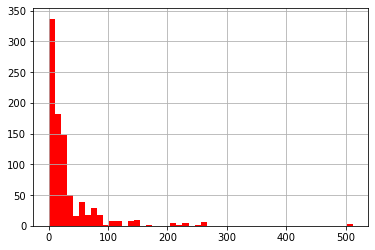

In [12]:
df_train['Fare'].hist(bins = 50, color = 'red')

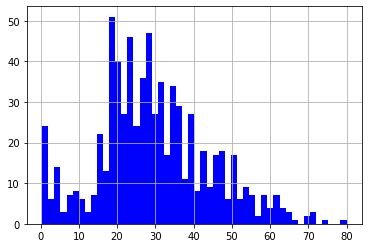

In [13]:
df_train['Age'].hist(bins = 50, color = 'blue')

In [14]:
df_train.groupby('Sex')[['Survived']].mean() #74.2% females survived while only 18.89% males survived

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
#Survival rate by sex and class
df_train.pivot_table('Survived', index='Sex', columns='Pclass')
#Almost all females from class 1 survived while least of class 3 males survived

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [16]:
#Survival rate by sex, age and class
age = pd.cut(df_train['Age'], [0, 18, 80])
df_train.pivot_table('Survived', ['Sex', age], 'Pclass')
# So we should have a column of adult/child

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

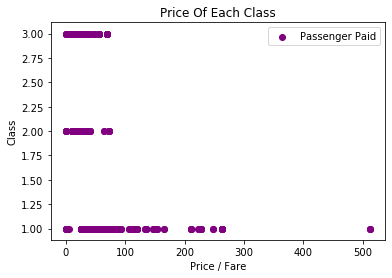

In [17]:
#Plot the Prices Paid Of Each Class
plt.scatter(df_train['Fare'],df_train['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [18]:
#Survival rate by sex, age,family size and class
famsize=df_train['SibSp']+df_train['Parch']+1
df_train.pivot_table('Survived',['Pclass',famsize],['Sex',age])
#Family size can be considered as a additional feature

Sex         female                male          
Age        (0, 18]  (18, 80]   (0, 18]  (18, 80]
Pclass                                          
1      1  1.000000  0.967742       NaN  0.370370
       2  1.000000  1.000000  0.000000  0.400000
       3  1.000000  1.000000  1.000000  0.333333
       4  0.500000  0.500000  1.000000  1.000000
       5  1.000000  1.000000       NaN       NaN
       6       NaN  1.000000       NaN  0.000000
2      1  1.000000  0.892857  0.000000  0.087719
       2  1.000000  0.866667       NaN  0.066667
       3  1.000000  0.888889  1.000000  0.000000
       4  1.000000  1.000000  1.000000  0.000000
       5       NaN  1.000000       NaN       NaN
       6       NaN  1.000000       NaN       NaN
3      1  0.666667  0.500000  0.133333  0.139535
       2  0.555556  0.333333  0.600000  0.125000
       3  0.571429  0.500000  0.400000  0.090909
       4  1.000000  1.000000  1.000000  0.000000
       5  0.000000  0.000000  0.000000       NaN
       6  0.000000  0.000000  0.000000  0.000000
       7  0.333333  0.500000  0.333333  0.000000
       8  0.000000  0.000000  0.000000       NaN

In [19]:
#Survival rate by title
title = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
df_train.pivot_table('Survived', index=title, columns='Pclass')
#All the ladies, sir's, countesses, master's,mlle's and mme's survived
#We can have another variable with regards to status of passengers

Pclass,1,2,3
Name,,,
Capt,0.000000,NaN,NaN
Col,0.500000,NaN,NaN
Countess,1.000000,NaN,NaN
Don,0.000000,NaN,NaN
Dr,0.600000,0.000000,NaN
Jonkheer,0.000000,NaN,NaN
Lady,1.000000,NaN,NaN
Major,0.500000,NaN,NaN
Master,1.000000,1.000000,0.392857


In [20]:
cab=df_train['Cabin'].isna()
df_train.pivot_table('Survived','Pclass',cab)

Cabin,False,True
Pclass,,
1,0.664773,0.475000
2,0.812500,0.440476
3,0.500000,0.235908


In [21]:
# Check datatype of each variable
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# Check unique values for object datatype
df_train.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Doling, Mrs. John T (Ada Julia Bone)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [23]:
#Print the unique values in the string type columns
print(df_train['Sex'].unique())
print(df_train['Embarked'].unique())
print(df_train['Cabin'].unique())
print(df_train['Ticket'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['A/5 2

There are missing values in cabin and embarked before converting to non-numeric we must impute the missing values.

In [24]:
Group=df_train['Ticket'].duplicated(False)
df_train.pivot_table('Survived',Group,'Pclass')
#Survival chances of those travelling in group is higher for all classes

Pclass,1,2,3
Ticket,,,
False,0.474227,0.420561,0.209913
True,0.756303,0.545455,0.317568


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


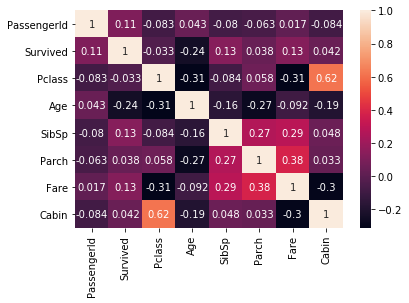

In [25]:
cab=df_train[~df_train['Cabin'].isna()]
cab['Cabin']=cab['Cabin'].str[:1]
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'U':9}
cab['Cabin'] = cab['Cabin'].map(cabin_category)
cab['Cabin'].unique().tolist()
sns.heatmap(cab.corr(),annot=True)
#Deck seems to have highest correlation with Pclass.

In [26]:
# Add missing variable/output column
df_test['Survived'] = np.nan

# Train + test concatenation
df_full = pd.concat([df_train, df_test])

df_full.isnull().mean().sort_values(ascending = False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [27]:
df_full.isnull().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

# Missing Value Treatment
The null values for Survived are introduced by me but the variables cabin,age,embarked and fare seem to have missing values as well.

In [28]:
#Look at the other feature values for the missing data of Embarked
df_full[df_full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both were in cabin B28 on the same ticket. When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
Also if we fill with the mode value we get the same

In [29]:
# Filling the missing values in Embarked with S
df_full['Embarked'] = df_full['Embarked'].fillna('S')

In [30]:
#Missing data for Fare 
df_full[df_full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [31]:
#Single male of class 3 who embarked from S
df_full[(df_full['Pclass']==3)&(df_full['Sex']=='male')&(df_full['Embarked']=='S')&(df_full['SibSp']==0)&(df_full['Parch']==0)&(df_full['Age']>50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,95,0.0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
152,153,0.0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
222,223,0.0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
406,407,0.0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
631,632,0.0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [32]:
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
fare = df_full.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_full['Fare'] = df_full['Fare'].fillna(fare)

# **Converting non-numeric data to numeric data**

Encode sex and embarked with label encoder.

In [33]:
#In order to use decision tree we cannot use OneHotEncoder so instead we use label encoder for sex
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder

#Encode sex column
df_full['Sex']= LabelEncoder().fit_transform(df_full['Sex'].values)

#Encode embarked column
#df_full['Embarked']= LabelEncoder().fit_transform(df_full['Embarked'].values)

#Print the NEW unique values in the columns
print(df_full['Sex'].unique())
#print(df_full['Embarked'].unique())

[1 0]


**Get Titles from Name** to impute missing Age values

In [34]:
#Get titles from name
df_full['Title'] = df_full.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df_full['Title'].unique().tolist()
# Look at salutations percentages
df_full['Title'].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Rev          0.611154
Dr           0.611154
Col          0.305577
Ms           0.152788
Mlle         0.152788
Major        0.152788
Don          0.076394
Capt         0.076394
Sir          0.076394
Jonkheer     0.076394
Dona         0.076394
Mme          0.076394
Lady         0.076394
Countess     0.076394
Name: Title, dtype: float64

In [35]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
df_full.Title = df_full.Title.map(normalized_titles)# view value counts for the normalized titles
print(df_full.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [36]:
df_full['Title'].value_counts(normalize = True) * 100

Mr         57.830405
Miss       20.015279
Mrs        15.278839
Master      4.660046
Officer     1.757066
Royalty     0.458365
Name: Title, dtype: float64

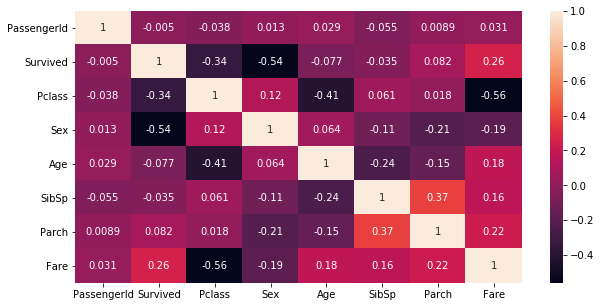

In [37]:
#For Age
plt.figure(figsize = (10, 5))
sns.heatmap(df_full.corr(), annot = True)
#Survived is most correlated to Sex followed by Pclass, while age is also most correlated to Pclass.

In [38]:
# group by Sex, Pclass, and Title 
grouped = df_full.groupby(['Sex','Pclass', 'Title'])  # view the median Age by the grouped features 
grouped.Age.median()

Sex  Pclass  Title  
0    1       Miss       30.0
             Mrs        45.0
             Officer    49.0
             Royalty    39.0
     2       Miss       20.0
             Mrs        30.0
     3       Miss       18.0
             Mrs        31.0
1    1       Master      6.0
             Mr         41.5
             Officer    52.0
             Royalty    40.0
     2       Master      2.0
             Mr         30.0
             Officer    41.5
     3       Master      6.0
             Mr         26.0
Name: Age, dtype: float64

In [39]:
# For age the median will also vary with sex and title
df_full['Age'] = df_full.groupby(["Pclass","Sex","Title"])['Age'].transform(lambda x: x.fillna(x.median()))

In [40]:
#Turning cabin number to deck
df_full['Cabin'] = df_full['Cabin'].fillna('U')
df_full['Deck'] = df_full['Cabin'].map(lambda x: x[0])
df_full.groupby('Survived')['Deck'].value_counts()

Survived  Deck
0.0       U       481
          C        24
          B        12
          A         8
          D         8
          E         8
          F         5
          G         2
          T         1
1.0       U       206
          B        35
          C        35
          D        25
          E        24
          F         8
          A         7
          G         2
Name: Deck, dtype: int64

In [41]:
df_full.head(65)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,Mr,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,0.0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,U,C,Mr,U
61,62,1.0,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0000,B28,S,Miss,B
62,63,0.0,1,"Harris, Mr. Henry Birkhardt",1,45.0,1,0,36973,83.4750,C83,S,Mr,C
63,64,0.0,3,"Skoog, Master. Harald",1,4.0,3,2,347088,27.9000,U,S,Master,U


In [42]:
#To Determine Relationship between categorical variables 
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Feature Engineering

In [43]:
# Feature 1: Title

In [44]:
# Feature 2 : Family Size
df_full['FamSize']=df_full['SibSp']+df_full['Parch']+1

# Categorical features to numbers
Using dummy variables

In [45]:
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,FamSize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S,Mr,U,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S,Mr,U,1


In [46]:
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(df_full.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(df_full.Title, prefix="Title")
deck_dummies = pd.get_dummies(df_full.Deck, prefix="Deck")
embarked_dummies = pd.get_dummies(df_full.Embarked, prefix="Embarked")# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([df_full, pclass_dummies, title_dummies, deck_dummies, embarked_dummies], axis=1)

# drop categorical and redundant fields
titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket','Deck'], axis=1, inplace=True)

titanic_dummies.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamSize,Pclass_1,Pclass_2,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,1,22.0,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,1,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
# Recover test dataset
test = titanic_dummies[titanic_dummies['Survived'].isna()].drop(['Survived'], axis = 1)

# Recover train dataset
train = titanic_dummies[titanic_dummies['Survived'].notna()]
# Cast 'Survived' back to integer
train['Survived'] = train['Survived'].astype(np.int8)
train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamSize,Pclass_1,Pclass_2,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.0,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,0,38.0,1,0,71.2833,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,0,26.0,0,0,7.9250,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1,0,35.0,1,0,53.1000,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,1,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
# Import module for dataset splitting
from sklearn.model_selection import train_test_split

# Here is out local validation scheme!
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis = 1), 
                                                    train['Survived'], test_size = 0.2, 
                                                    random_state = 2)

# Logistic Regression

In [49]:
# Using logistic regression model 
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Predict!
predictions = logisticRegression.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

# Print the resulting confusion matrix
print(confusion_matrix(y_test, predictions))

[[89 11]
 [24 55]]


In [51]:
# Calculate Accuracy!
accuracy = (89 + 55) / (89 + 11 + 24 + 55)
print('accuracy is: ' + str(round(accuracy, 3)))

accuracy is: 0.804


In [52]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.86713287 0.84615385 0.83098592 0.82394366 0.82394366]
0.8384319905446667


# Random Forest Classifier

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize randomForest
randomForest = RandomForestClassifier()
# Set our parameter grid
param_grid = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 60, 10)],
)
#param_grid = { 
#    'criterion' : ['gini', 'entropy'],
#    'n_estimators': [100, 300, 500],
#    'max_features': ['auto', 'log2'],
#    'max_depth' : [3, 5, 7]    
#}
from sklearn.model_selection import GridSearchCV

# Grid search
randomForest_CV = GridSearchCV(estimator = randomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [54]:
# Print best hyperparameters
randomForest_CV.best_params_

{'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 50}

In [55]:
print("Best score: {}".format(randomForest_CV.best_score_))
print("Optimal params: {}".format(randomForest_CV.best_estimator_))

Best score: 0.8525066482812962
Optimal params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [56]:
# Predict!
RFpredictions = randomForest_CV.predict(X_test)
from sklearn.metrics import accuracy_score

# Calculate the accuracy for our powerful random forest!
print("accuracy is: ", round(accuracy_score(y_test, predictions), 3))

accuracy is:  0.804


In [57]:
# Accuracy of Logistic Regression is more than Random Forest
test['Survived'] = logisticRegression.predict(test.drop(['PassengerId'], axis = 1))
# Write test predictions for final submission
test[['PassengerId', 'Survived']].to_csv('titanic_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
